<a href="https://colab.research.google.com/github/MJVNOR/WorkStatistic/blob/master/PruebasHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Librerias (no todas son necesarias)

import pandas as pd
import numpy as np
import google.colab
import math 
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from numpy import loadtxt
from numpy import linspace,pi, sqrt
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import binom
from math import exp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Si vas a usar archivo ingresalo primero
from google.colab import files
uploaded = files.upload()

¿A que parametro desea realizarle una prueba de Hipotesis?
Para realizar una prueba de media 0
Para realizar una prueba de varianza escoja 1
Para realziar una prueba de proporcion escoja 2
--->0
¿Que tipo de prueba quiere realizar?
Para prueba bilateral escoja 0
Para prueba de cola derecha escoja 1
Para prueba de cola izquierda escoja 2
--->0
Escogio realizar una prueba para la media
introduzca el nivel de significancia que desea: (alpha de 1 a 99)
--->55
introduzca el tamaño de muestra: (n)
--->50
¿la distribución tiene sigma conocida?
escriba 'si' o 'no' 
--->no
Desea introducir los datos de una hoja de calculo?
escriba 'si' o 'no' 
--->no
Introduzca el valor de la desviacion estandar muestral (s)
--->25
Introduzca el valor de la media muestral (xbarra)
--->52
Introduzca la hipotesis nula para el valor de mu (H0 = Mu0)
--->5


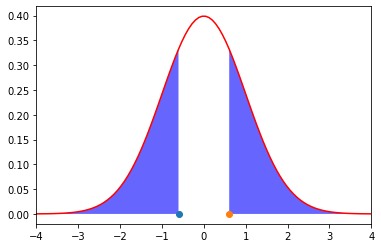

PRUEBA POR ZONA DE RECHAZO:
Debido a que la estimación se encuentra en la region de rechazo
la hipotesis H0 =  5.0  es rechazada
PRUEBA POR VALOR P
Su valor P minimo es: 1.260616819631341e-40
Como 1.260616819631341e-40 < 0.275 la hipotesis H0 es rechazada


In [0]:
#Se le pregunta al usuario el tipo de estimación realizará
#según que tipo de estimación realizará se usará diferente distribución

print("¿A que parametro desea realizarle una prueba de Hipotesis?")
print("Para realizar una prueba de media 0")
print("Para realizar una prueba de varianza escoja 1")
print("Para realziar una prueba de proporcion escoja 2")

#Variable que guarda informacion del parametro que se quiere poner a prueba
choice = int(input("--->"))

print("¿Que tipo de prueba quiere realizar?")
print("Para prueba bilateral escoja 0")
print("Para prueba de cola derecha escoja 1")
print("Para prueba de cola izquierda escoja 2")

#Variable que guarda informacion sobre el tipo de pueba (bilateral o unilateral)
tipo = int(input("--->"))

if choice == 0:
#Para estimar mu se usará la normal estandar o t-student

    print("Escogio realizar una prueba para la media")

    #Variable para el nivel de confianza que se desea en la prueba 
    print("introduzca el nivel de significancia que desea: (alpha de 1 a 99)")
    sign = float(input("--->"))

    #Variable para el tamaño de la muestra
    print("introduzca el tamaño de muestra: (n)")
    n = int(input("--->"))

    #Variable de desicion para escoger entre sigma conocida o desconocida
    print("¿la distribución tiene sigma conocida?")
    print("escriba 'si' o 'no' ")
    ans = input("--->")


    if ans == 'si' :
    #Para sigma conocida se usa la normal estandar

        print("introduzca el valor de sigma:")
        sigma = float(input("--->"))

        print("Desea introducir los datos de una hoja de calculo?")
        print("escriba 'si' o 'no' ")
        inpt = input("--->")

        if inpt == 'si':

            #METER DATOS CON EXCEL 
            print("Esperando Datos de Excel...")

        if inpt == 'no': 

            #METER DATOS A MANO

            print("Introduzca el valor de la media muestral (xbarra)")
            xbarra = float(input("--->"))

            print("Introduzca la hipotesis nula para el valor de Mu (H0 = mu0)")
            H0 = float(input("--->"))

        #CALCULO DE LOS VALORES CRITICOS Y GRAFICACIÓN:

        #se obtiene el area de la region de rechazo
        alpha = sign/100
        #se estandariza la variable
        z = (xbarra - H0)/(sigma/np.sqrt(n))
        #se declara la grafica
        fig, ax = plt.subplots(1, 1)

        #Se calculan los puntos claves importante para cada caso
        a = -4
        b = 4
        pa = norm.ppf(alpha/2)
        pb = norm.ppf(1-(alpha/2))
        pi = norm.ppf(alpha)
        pd = norm.ppf(1-alpha)

        #Se obtienen los puntos P

        pvi = norm.cdf(z)
        pvd = norm.sf(z)
        pv = min(pvi,pvd)

        if tipo == 0:
        #Prueba bilateral
    
            x = np.linspace(a,b, 100)
            ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
            plt.fill_between(x,0,norm.pdf(x),where=((x<pa) | (x>pb)) ,facecolor='b', alpha=0.6)
            plt.axvline(x=z, ymin=0.05, ymax=0.9)
            plt.xlim(a, b)
            plt.scatter(pa,0)
            plt.scatter(pb,0)
            plt.show()

            if z > pa and z < pb :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P minimo es:", pv)
                print("Como", pv ,">", alpha/2,"la hipotesis H0 no es rechazada")
              
            elif z < pa or z > pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", H0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P minimo es:", pv)
                print("Como", pv ,"<", alpha/2,"la hipotesis H0 es rechazada")


    
        elif tipo == 1:
        #Prueba de cola derecha

            x = np.linspace(a,b, 100)
            ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
            plt.fill_between(x,0,norm.pdf(x),where=(x>pd) ,facecolor='b', alpha=0.6)
            plt.axvline(x=z, ymin=0.05, ymax=0.9)
            plt.xlim(a, b)
            plt.scatter(pd,0)
            plt.show()

            if z < pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P es:", pvd)
                print("Como", pvd ,">", alpha,"la hipotesis H0 no es rechazada")
              
            elif z > pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", H0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P es:", pvd)
                print("Como", pvd ,"<", alpha,"la hipotesis H0 es rechazada")
    
        elif tipo == 2:
        #Prueba de cola izquierda
    
            x = np.linspace(a,b, 100)
            ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
            plt.fill_between(x,0,norm.pdf(x),where=(x<pi) ,facecolor='b', alpha=0.6)
            plt.axvline(x=z, ymin=0.05, ymax=0.9)
            plt.xlim(a, b)
            plt.scatter(pi,0)
            plt.show()

            if z > pi :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P es:", pvi)
                print("Como", pvi ,">", alpha,"la hipotesis H0 no es rechazada")
              
            elif z < pi :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", H0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P minimo es:", pvi)
                print("Como", pvi ,"<", alpha,"la hipotesis H0 es rechazada")


    elif ans == 'no' :
    #Para sigma desconocida se puede usar normal estandar o t-student
    #Normal estandar con un tamaño de muestra grande ( > 30 )
    #t-student para cualquier otro caso


        if n > 30 : 

            #usar aproximacion normal
            #creacion de gráfica para H

            print("Desea introducir los datos de una hoja de calculo?")
            print("escriba 'si' o 'no' ")
            inpt = input("--->")

            if inpt == 'si':

                #METER DATOS CON EXCEL 
                print("Esperando Datos de Excel...")

            if inpt == 'no': 

                #METER DATOS A MANO
                print("Introduzca el valor de la desviacion estandar muestral (s)")
                s = float(input("--->"))

                print("Introduzca el valor de la media muestral (xbarra)")
                xbarra = float(input("--->"))

                print("Introduzca la hipotesis nula para el valor de mu (H0 = Mu0)")
                H0 = float(input("--->"))

            alpha = sign/100
            z = (xbarra - H0)/(float(s)/np.sqrt(n))
            fig, ax = plt.subplots(1, 1)

            a = -4
            b = 4

            pa = norm.ppf(alpha/2)
            pb = norm.ppf(1-(alpha/2))
            pi = norm.ppf(alpha)
            pd = norm.ppf(1-alpha)

            #Se obtienen los puntos P

            pvi = norm.cdf(z)
            pvd = norm.sf(z)
            pv = min(pvi,pvd)

            if tipo == 0:
    
                x = np.linspace(a,b, 100)
                ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
                plt.fill_between(x,0,norm.pdf(x),where=((x<pa) | (x>pb)) ,facecolor='b', alpha=0.6)
                plt.axvline(x=z, ymin=0.05, ymax=0.9)
                plt.xlim(a, b)
                plt.scatter(pa,0)
                plt.scatter(pb,0)
                plt.show()

                if z > pa and z < pb :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de aceptacion")
                    print("No hay evidencia para que la hipotesis nula sea rechazada")
                    print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                    print("PRUEBA POR VALOR P:")
                    print("Su valor P minimo es:", pv)
                    print("Como", pv ,">", alpha/2,"la hipotesis H0 no es rechazada")
              
                elif z < pa or z > pd :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de rechazo")
                    print("la hipotesis H0 = ", H0 ," es rechazada")
        
                    print("PRUEBA POR VALOR P")
                    print("Su valor P minimo es:", pv)
                    print("Como", pv ,"<", alpha/2,"la hipotesis H0 es rechazada")
    
            elif tipo == 1:
    
                x = np.linspace(a,b, 100)
                ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
                plt.fill_between(x,0,norm.pdf(x),where=(x>pd) ,facecolor='b', alpha=0.6)
                plt.axvline(x=z, ymin=0.05, ymax=0.9)
                plt.xlim(a, b)
                plt.scatter(pd,0)
                plt.show()

                if z < pd :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de aceptacion")
                    print("No hay evidencia para que la hipotesis nula sea rechazada")
                    print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                    print("PRUEBA POR VALOR P:")
                    print("Su valor P es:", pvd)
                    print("Como", pvd ,">", alpha,"la hipotesis H0 no es rechazada")
              
                elif z > pd :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de rechazo")
                    print("la hipotesis H0 = ", H0 ," es rechazada")
        
                    print("PRUEBA POR VALOR P")
                    print("Su valor P es:", pvd)
                    print("Como", pvd ,"<", alpha,"la hipotesis H0 es rechazada")
    
            elif tipo == 2:
    
                x = np.linspace(a,b, 100)
                ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
                plt.fill_between(x,0,norm.pdf(x),where=(x<pi) ,facecolor='b', alpha=0.6)
                plt.axvline(x=z, ymin=0.05, ymax=0.9)
                plt.xlim(a, b)
                plt.scatter(pi,0)
                plt.show()

                if z > pi :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de aceptacion")
                    print("No hay evidencia para que la hipotesis nula sea rechazada")
                    print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                    print("PRUEBA POR VALOR P:")
                    print("Su valor P es:", pvi)
                    print("Como", pvi ,">", alpha,"la hipotesis H0 no es rechazada")
              
                elif z < pi :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de rechazo")
                    print("la hipotesis H0 = ", H0 ," es rechazada")
        
                    print("PRUEBA POR VALOR P")
                    print("Su valor P es:", pvi)
                    print("Como", pvi ,"<", alpha,"la hipotesis H0 es rechazada")


        elif n < 30 : 

            #usar t-student
            #creacion de gráfica para H usando t-student con n-1 grados de libertad

            print("Desea introducir los datos de una hoja de calculo?")
            print("escriba 'si' o 'no' ")
            inpt = input("--->")

            if inpt == 'si':

                #METER DATOS CON EXCEL
                print("Esperando Datos de Excel...")

            if inpt == 'no': 

                print("Introduzca el valor de la media muestral (xbarra)")
                xbarra = float(input("--->"))

                print("Introduzca la hipotesis nula para el valor de mu (H0 = mu0)")
                H0 = float(input("--->"))

            alpha = sign/100
            df = n-1
            a = -5
            b = 5

            T = (xbarra-H0)/(s/np.sqrt(n))

            pa = t.ppf(alpha/2, df )
            pb = t.ppf(1-(alpha/2),df)
            pi = t.ppf(alpha,df)
            pd = t.ppf(1-alpha,df)

            #Se calculan los puntos P

            pvi = t.cdf(T)
            pvd = t.sf(T)
            pv = min(pvi,pvd)

            fig, ax = plt.subplots(1, 1)

            if tipo == 0:
    
                x = np.linspace(a,b, 100)
                ax.plot(x, t.pdf(x, df),'r-',label='t pdf')
                plt.fill_between(x,0,t.pdf(x, df),where=((x<pa) | (x>pb)) ,facecolor='b', alpha=0.6)
                plt.axvline(x=T, ymin=0.05, ymax=0.9)
                plt.xlim(a, b)
                plt.scatter(pa,0)
                plt.scatter(pb,0)
                plt.show()

                if T > pa and T < pb :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de aceptacion")
                    print("No hay evidencia para que la hipotesis nula sea rechazada")
                    print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                    print("PRUEBA POR VALOR P:")
                    print("Su valor P minimo es:", pv)
                    print("Como", pv ,">", alpha/2,"la hipotesis H0 no es rechazada")
              
                elif T < pa or X2 > pd :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de rechazo")
                    print("la hipotesis H0 = ", H0 ," es rechazada")
        
                    print("PRUEBA POR VALOR P")
                    print("Su valor P minimo es:", pv)
                    print("Como", pv ,"<", alpha/2,"la hipotesis H0 es rechazada")

            if tipo == 1:
    
                x = np.linspace(a,b, 100)
                ax.plot(x, t.pdf(x, df),'r-',label='t pdf')
                plt.fill_between(x,0,t.pdf(x, df),where=(x>pd) ,facecolor='b', alpha=0.6)
                plt.axvline(x=T, ymin=0.05, ymax=0.9)
                plt.xlim(a, b)
                plt.scatter(pd,0)
                plt.show()

                if T < pd :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de aceptacion")
                    print("No hay evidencia para que la hipotesis nula sea rechazada")
                    print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                    print("PRUEBA POR VALOR P:")
                    print("Su valor P es:", pvd)
                    print("Como", pvd ,">", alpha,"la hipotesis H0 no es rechazada")
              
                elif T > pd :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de rechazo")
                    print("la hipotesis H0 = ", H0 ," es rechazada")
        
                    print("PRUEBA POR VALOR P")
                    print("Su valor P es:", pvd)
                    print("Como", pvd ,"<", alpha,"la hipotesis H0 es rechazada")
    
            if tipo == 2:
    
                x = np.linspace(a,b, 100)
                ax.plot(x, t.pdf(x, df),'r-',label='t pdf')
                plt.fill_between(x,0,t.pdf(x, df),where=(x<pi) ,facecolor='b', alpha=0.6)
                plt.axvline(x=T, ymin=0.05, ymax=0.9)
                plt.xlim(a, b)
                plt.scatter(pi,0)
                plt.show()

                if T > pi :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de aceptacion")
                    print("No hay evidencia para que la hipotesis nula sea rechazada")
                    print("Por lo tanto, la hipótesis H0 = ",H0 ," no es rechazada")
        
                    print("PRUEBA POR VALOR P:")
                    print("Su valor P es:", pvi)
                    print("Como", pvi ,">", alpha,"la hipotesis H0 no es rechazada")
              
                elif T < pi :
        
                    print("PRUEBA POR ZONA DE RECHAZO:")
                    print("Debido a que la estimación se encuentra en la region de rechazo")
                    print("la hipotesis H0 = ", H0 ," es rechazada")
        
                    print("PRUEBA POR VALOR P")
                    print("Su valor P es:", pvi)
                    print("Como", pvi ,"<", alpha,"la hipotesis H0 es rechazada")




elif choice == 1:
#Para estimar sigma, se usará una distribución chi-2

    print("Escogio estimar la varianza")

    print("introduzca el nivel de significancia: (alpha de 1 a 99)")
    sign = float(input("--->"))

    print("introduzca el tamaño de muestra:")
    n = int(input("--->"))

    print("Desea introducir los datos de una hoja de calculo?")
    print("escriba 'si' o 'no' ")
    inpt = input("--->")

    if inpt == 'si':

        #METER DATOS CON EXCEL 
        print("Esperando Datos de Excel...")

    if inpt == 'no': 

        df = n-1

        print("Introduzca la hipotesis nula para sigma")
        H0 = float(input("--->"))

        print("Introduzca el valor de la desviacion estandar")
        s2 = float(input("--->"))

    alpha = sign/100    
    sigma = H0
    X2 = ((n-1)*s2)/sigma
    s = np.sqrt(df)

    fig, ax = plt.subplots(1, 1)

    a = df - 6*s
    b = df + 6*s

    pa = chi2.ppf( alpha/2 , df)
    pb = chi2.ppf( 1-(alpha/2) , df)
    pi = chi2.ppf( alpha , df)
    pd = chi2.ppf( 1 - alpha ,df)

    #Calculo de valores P
    pvi= chi2.cdf( X2  , df)
    pvd = chi2.sf( X2 , df)
    pv = min(pvi, pvd)

    x = np.linspace(a,b, 100)
    ax.plot(x, chi2.pdf(x, df),'r-')

    if tipo == 0:
    
        plt.fill_between(x,0,chi2.pdf(x, df),where=((x<pa) | (x>pb)) ,facecolor='b', alpha=0.6)
        plt.xlim(a,b)
        plt.axvline(x=X2, ymin=0.05, ymax=0.9)
        plt.scatter(pa,0)
        plt.scatter(pb,0)
        plt.show()

        if X2 > pa and X2 < pb :
        
            print("PRUEBA POR ZONA DE RECHAZO:")
            print("Debido a que la estimación se encuentra en la region de aceptacion")
            print("No hay evidencia para que la hipotesis nula sea rechazada")
            print("Por lo tanto, la hipótesis H0 = ",sigma ," no es rechazada")
        
            print("PRUEBA POR VALOR P:")
            print("Su valor P minimo es:", pv)
            print("Como", pv ,">", alpha/2,"la hipotesis H0 no es rechazada")
              
        elif X2 < pa or X2 > pd :
        
            print("PRUEBA POR ZONA DE RECHAZO:")
            print("Debido a que la estimación se encuentra en la region de rechazo")
            print("la hipotesis H0 = ", sigma ," es rechazada")
        
            print("PRUEBA POR VALOR P")
            print("Su valor P minimo es:", pv)
            print("Como", pv ,"<", alpha/2,"la hipotesis H0 es rechazada")
    
    if tipo == 1:
    
        plt.fill_between(x,0,chi2.pdf(x, df),where=(x>pd) ,facecolor='b', alpha=0.6)
        plt.xlim(a,b)
        plt.axvline(x=X2, ymin=0.05, ymax=0.9)
        plt.scatter(pd,0)
        plt.show()

        if X2 < pd :
        
            print("PRUEBA POR ZONA DE RECHAZO:")
            print("Debido a que la estimación se encuentra en la region de aceptacion")
            print("No hay evidencia para que la hipotesis nula sea rechazada")
            print("Por lo tanto, la hipótesis H0 = ",sigma ," no es rechazada")
        
            print("PRUEBA POR VALOR P:")
            print("Su valor P es:", pvd)
            print("Como", pvd ,">", alpha,"la hipotesis H0 no es rechazada")
              
        elif X2 > pd :
        
            print("PRUEBA POR ZONA DE RECHAZO:")
            print("Debido a que la estimación se encuentra en la region de rechazo")
            print("la hipotesis H0 = ", sigma ," es rechazada")
        
            print("PRUEBA POR VALOR P")
            print("Su valor P es:", pvd)
            print("Como", pvd ,"<", alpha,"la hipotesis H0 es rechazada")
    
    if tipo == 2:

        plt.fill_between(x,0,chi2.pdf(x, df),where=(x<pi) ,facecolor='b', alpha=0.6)
        plt.xlim(a,b)
        plt.axvline(x=X2, ymin=0.05, ymax=0.9)
        plt.scatter(pi,0)
        plt.show()

        if X2 > pi :
        
            print("PRUEBA POR ZONA DE RECHAZO:")
            print("Debido a que la estimación se encuentra en la region de aceptacion")
            print("No hay evidencia para que la hipotesis nula sea rechazada")
            print("Por lo tanto, la hipótesis H0 = ",sigma ," no es rechazada")
        
            print("PRUEBA POR VALOR P:")
            print("Su valor P es:", pvi)
            print("Como", pvi ,">", alpha,"la hipotesis H0 no es rechazada")
              
        elif X2 < pi :
        
            print("PRUEBA POR ZONA DE RECHAZO:")
            print("Debido a que la estimación se encuentra en la region de rechazo")
            print("la hipotesis H0 = ", sigma ," es rechazada")
        
            print("PRUEBA POR VALOR P")
            print("Su valor P es:", pvi)
            print("Como", pvi ,"<", alpha,"la hipotesis H0 es rechazada")


elif choice == 2 : 
#Para estimar una proporción, se usara la distribución normal estandar o la binomial 

    print("introduzca el nivel de significancia: (alpha de 1 a 99)")
    sign = float(input("--->"))

    print("introduzca el tamaño de muestra (n) :")
    n = int(input("--->"))

    print("Introduzca el numero de aciertos (X)")
    xm = int(input("--->"))

    print("Introduzca la hipótesis nula para la proporcion (H0 = P0):")
    p0 = float(input("--->"))

    p = xm/n

    alpha = sign/100

    if n > 35:
    #Usar aproximación de Normal Estandar

        desv = np.sqrt(p0*(1-p0)/n)
        z = (p-p0)/desv
        fig, ax = plt.subplots(1, 1)

        a = -4
        b = 4

        pa = norm.ppf(alpha/2)
        pb = norm.ppf(1-(alpha/2))
        pi = norm.ppf(alpha)
        pd = norm.ppf(1-alpha)

        #Se calculan los valores P
        pvi = norm.cdf(z)
        pvd = norm.sf(z)
        pv = min(pvi,pvd)

        if tipo == 0:
    
            x = np.linspace(a,b, 100)
            ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
            plt.fill_between(x,0,norm.pdf(x),where=((x<pa) | (x>pb)) ,facecolor='b', alpha=0.6)
            plt.axvline(x=z, ymin=0.05, ymax=0.9)
            plt.xlim(a, b)
            plt.scatter(pa,0)
            plt.scatter(pb,0)
            plt.show()

            if z > pa and z < pb :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",p0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P minimo es:", pv)
                print("Como", pv ,">", alpha/2,"la hipotesis H0 no es rechazada")
              
            elif z < pa or z > pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", p0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P minimo es:", pv)
                print("Como", pv ,"<", alpha/2,"la hipotesis H0 es rechazada")
    
        elif tipo == 1:
    
            x = np.linspace(a,b, 100)
            ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
            plt.fill_between(x,0,norm.pdf(x),where=(x>pd) ,facecolor='b', alpha=0.6)
            plt.axvline(x=z, ymin=0.05, ymax=0.9)
            plt.xlim(a, b)
            plt.scatter(pd,0)
            plt.show()

            if z < pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",p0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P es:", pvd)
                print("Como", pvd ,">", alpha,"la hipotesis H0 no es rechazada")
              
            elif z > pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", p0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P es:", pvd)
                print("Como", pvd ,"<", alpha,"la hipotesis H0 es rechazada")
    
        elif tipo == 2:
    
            x = np.linspace(a,b, 100)
            ax.plot(x, norm.pdf(x),'r-', label='norm pdf')
            plt.fill_between(x,0,norm.pdf(x),where=(x<pi) ,facecolor='b', alpha=0.6)
            plt.axvline(x=z, ymin=0.05, ymax=0.9)
            plt.xlim(a, b)
            plt.scatter(pi,0)
            plt.show()

            if z > pi :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",p0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P es:", pvi)
                print("Como", pvi ,">", alpha,"la hipotesis H0 no es rechazada")
              
            elif z < pi :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", p0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P es:", pvi)
                print("Como", pvi ,"<", alpha,"la hipotesis H0 es rechazada")


    elif n <= 35: 

        a = n*p0 - 3*n*p0*(1-p0)
        b = n*p0 + 3*n*p0*(1-p0)

        pa = binom.ppf( alpha/2, n, p0 )
        pb = binom.ppf( 1-(alpha/2), n, p0 )
        pi = binom.ppf( alpha, n, p0 )
        pd = binom.ppf( 1-alpha, n, p0 )

        #Se calculan los valores P

        pvi = binom.cdf(xm, n, p0)
        pvd = binom.sf(xm, n, p0)
        pv = min(pvi,pvd)

        fig, ax = plt.subplots(1, 1)

        x = np.arange(0,n)
        ax.plot(x, binom.pmf(x, n, p0))
        plt.xlim(a, b)

        if tipo == 0:
    
            r1 = np.arange(0,pa)
            r2 = np.arange(pa,pb)
            r3 = np.arange(pb,n)
            ax.vlines(r1, 0, binom.pmf(r1, n, p0), colors='r')
            ax.vlines(r2, 0, binom.pmf(r2, n, p0), colors='b')
            ax.vlines(r3, 0, binom.pmf(r3, n, p0), colors='r')
            plt.axvline(x=xm, ymin=0.05, ymax=0.9, color ='y')
            plt.show()

            if xm > pa and xm < pb :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",p0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P minimo es:", pv)
                print("Como", pv ,">", alpha/2,"la hipotesis H0 no es rechazada")
              
            elif xm < pa or xm > pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", p0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P minimo es:", pv)
                print("Como", pv ,"<", alpha/2,"la hipotesis H0 es rechazada")
    
        elif tipo == 1:
    
            r1 = np.arange(0,pd)
            r2 = np.arange(pd,n)
            ax.vlines(r1, 0, binom.pmf(r1, n, p0), colors='b')
            ax.vlines(r2, 0, binom.pmf(r2, n, p0), colors='r')
            plt.axvline(x=xm, ymin=0.05, ymax=0.9, color ='y')
            plt.show()

            if xm < pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",p0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P es:", pvd)
                print("Como", pvd ,">", alpha,"la hipotesis H0 no es rechazada")
              
            elif xm > pd :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", p0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P es:", pvd)
                print("Como", pvd ,"<", alpha,"la hipotesis H0 es rechazada")
    
        elif tipo == 2:
    
            r1 = np.arange(0,pi)
            r2 = np.arange(pi,n)
            ax.vlines(r1, 0, binom.pmf(r1, n, p0), colors='r')
            ax.vlines(r2, 0, binom.pmf(r2, n, p0), colors='b')
            plt.axvline(x=xm, ymin=0.05, ymax=0.9, color ='y')
            plt.show()

            if xm > pi :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de aceptacion")
                print("No hay evidencia para que la hipotesis nula sea rechazada")
                print("Por lo tanto, la hipótesis H0 = ",p0 ," no es rechazada")
        
                print("PRUEBA POR VALOR P:")
                print("Su valor P es:", pvi)
                print("Como", pvi ,">", alpha,"la hipotesis H0 no es rechazada")
              
            elif xm < pi :
        
                print("PRUEBA POR ZONA DE RECHAZO:")
                print("Debido a que la estimación se encuentra en la region de rechazo")
                print("la hipotesis H0 = ", p0 ," es rechazada")
        
                print("PRUEBA POR VALOR P")
                print("Su valor P es:", pvi)
                print("Como", pvi ,"<", alpha,"la hipotesis H0 es rechazada")


else: 

    print("Esa opcion no esta disponible, intente de nuevo")